In [29]:
import matplotlib.pyplot as plt
import json
import torch
import pickle
from typing import Optional
from matplotlib.colors import Normalize
import numpy as np
import os

import experiments.utils as utils



dictionaries_path = "../dictionary_learning/dictionaries"

# Another way to generate graphs, where you manually populate sweep_name and submodule_trainers
sweep_name = "pythia70m_test_sae"
submodule_trainers = {"resid_post_layer_3": {"trainer_ids": [0]}}

# Current recommended way to generate graphs. You can copy paste ae_sweep_paths directly from bib_intervention.py
ae_sweep_paths = {
    "pythia70m_sweep_standard_ctx128_0712": {
        "resid_post_layer_3": {"trainer_ids": [1, 7, 11, 18]}
    }
}
sweep_name = list(ae_sweep_paths.keys())[0]
submodule_trainers = ae_sweep_paths[sweep_name]

filter_class_ids = []
# filter_class_ids = [-4, -2]

ae_group_paths = utils.get_ae_group_paths(
    dictionaries_path, sweep_name, submodule_trainers
)
ae_paths = utils.get_ae_paths(ae_group_paths)

include_diff = True

print(ae_paths)

['../dictionary_learning/dictionaries/pythia70m_sweep_standard_ctx128_0712/resid_post_layer_3/trainer_1/', '../dictionary_learning/dictionaries/pythia70m_sweep_standard_ctx128_0712/resid_post_layer_3/trainer_7/', '../dictionary_learning/dictionaries/pythia70m_sweep_standard_ctx128_0712/resid_post_layer_3/trainer_11/', '../dictionary_learning/dictionaries/pythia70m_sweep_standard_ctx128_0712/resid_post_layer_3/trainer_18/']


In [33]:
thresholds = [0.1, 0.05, 0.025, 0.01, 0.001]
top_ns = [1, 10, 100, 500]


for i, ae_path in enumerate(ae_paths):
    node_effects_filename = f"{ae_path}/node_effects.pkl"

    with open(node_effects_filename, "rb") as f:
        node_effects = pickle.load(f)

    effects = node_effects[-4][ae_path]

    print(f"\nEffects for {ae_path}")
    for theshold in thresholds:
        above_threshold = effects[effects > theshold]
        count_above_threshold = above_threshold.shape[0]
        avg_above_threshold = above_threshold.mean().item()
        print(
            f"Threshold {theshold}: {count_above_threshold} nodes above threshold, {avg_above_threshold:.3f} average"
        )

    for top_n in top_ns:
        top_k = torch.topk(effects, top_n)
        avg_top_k = top_k.values.mean().item()
        print(f"Top {top_n}: {avg_top_k:.3f} average")



Effects for ../dictionary_learning/dictionaries/pythia70m_sweep_standard_ctx128_0712/resid_post_layer_3/trainer_1/
Threshold 0.1: 30 nodes above threshold, 0.171 average
Threshold 0.05: 81 nodes above threshold, 0.109 average
Threshold 0.025: 189 nodes above threshold, 0.067 average
Threshold 0.01: 378 nodes above threshold, 0.042 average
Threshold 0.001: 709 nodes above threshold, 0.024 average
Top 1: 0.349 average
Top 10: 0.254 average
Top 100: 0.097 average
Top 500: 0.033 average

Effects for ../dictionary_learning/dictionaries/pythia70m_sweep_standard_ctx128_0712/resid_post_layer_3/trainer_7/
Threshold 0.1: 4 nodes above threshold, 0.171 average
Threshold 0.05: 10 nodes above threshold, 0.112 average
Threshold 0.025: 23 nodes above threshold, 0.069 average
Threshold 0.01: 90 nodes above threshold, 0.029 average
Threshold 0.001: 1287 nodes above threshold, 0.004 average
Top 1: 0.297 average
Top 10: 0.112 average
Top 100: 0.027 average
Top 500: 0.009 average

Effects for ../dictiona

dict_keys([-4, -2, 0, 1, 2])
dict_keys(['../dictionary_learning/dictionaries/pythia70m_sweep_standard_ctx128_0712/resid_post_layer_3/trainer_1/'])
torch.Size([4096])


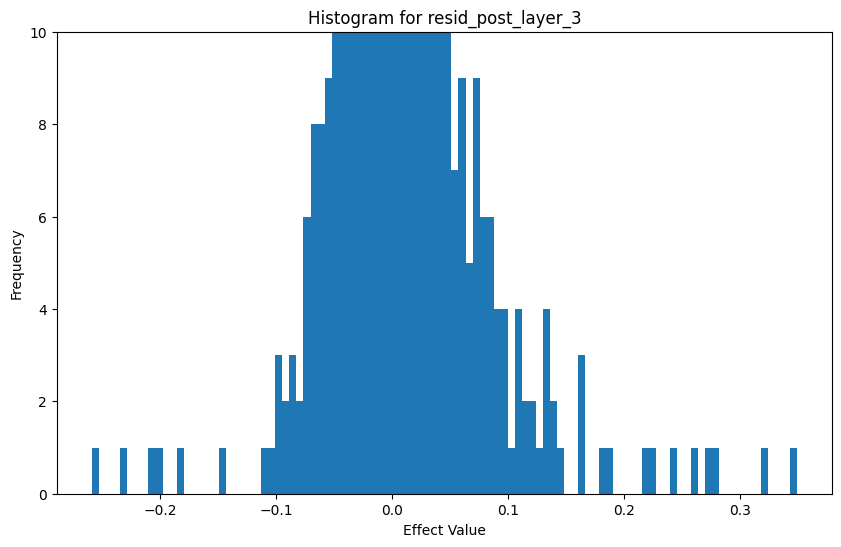

dict_keys([-4, -2, 0, 1, 2])
dict_keys(['../dictionary_learning/dictionaries/pythia70m_sweep_standard_ctx128_0712/resid_post_layer_3/trainer_7/'])
torch.Size([16384])


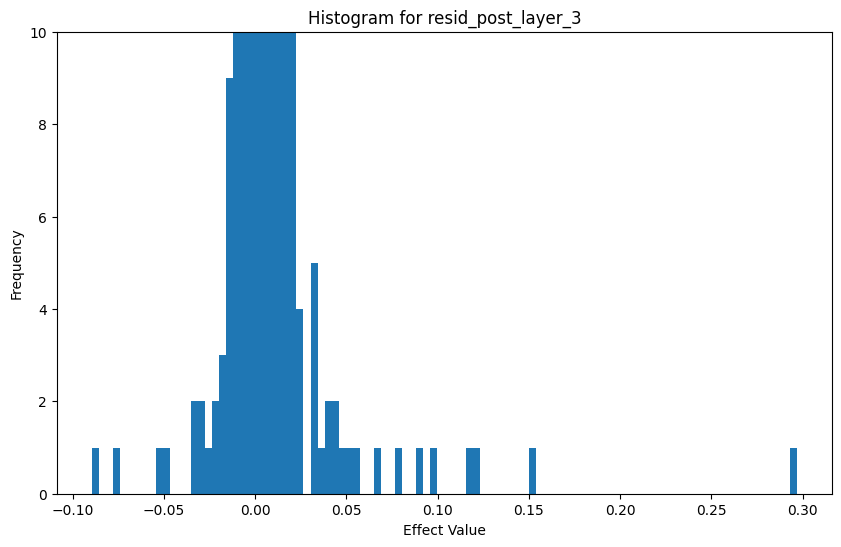

dict_keys([-4, -2, 0, 1, 2])
dict_keys(['../dictionary_learning/dictionaries/pythia70m_sweep_standard_ctx128_0712/resid_post_layer_3/trainer_11/'])
torch.Size([16384])


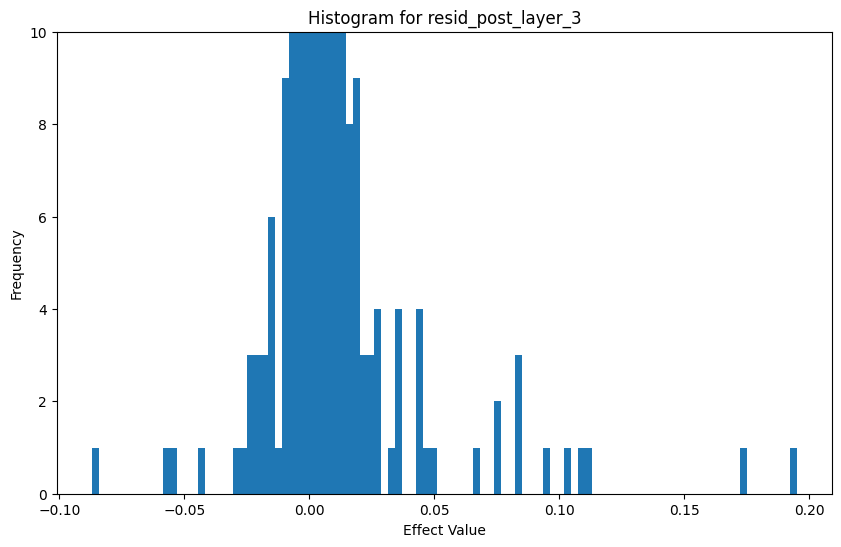

dict_keys([-4, -2, 0, 1, 2])
dict_keys(['../dictionary_learning/dictionaries/pythia70m_sweep_standard_ctx128_0712/resid_post_layer_3/trainer_18/'])
torch.Size([16384])


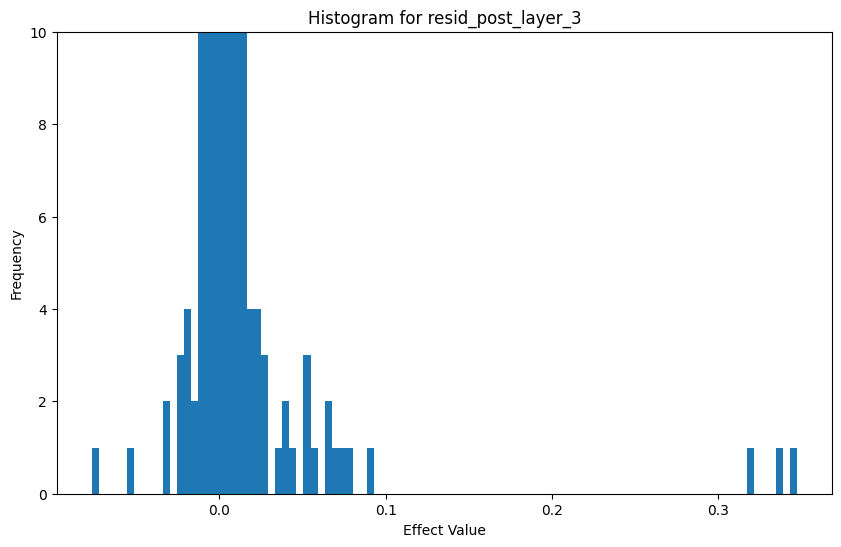

In [31]:
for i, ae_path in enumerate(ae_paths):
    node_effects_filename = f"{ae_path}/node_effects.pkl"

    with open(node_effects_filename, "rb") as f:
        node_effects = pickle.load(f)

    print(node_effects.keys())
    print(node_effects[-2].keys())

    effects = node_effects[-4][ae_path]
    print(effects.shape)

    # Create histogram
    plt.figure(figsize=(10, 6))
    plt.hist(effects, bins=100)
    plt.ylim(0, 10)
    plt.title(f'Histogram for {ae_path.split("/")[-3]}')
    plt.xlabel('Effect Value')
    plt.ylabel('Frequency')
    
    # Display the plot
    plt.show()
